In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import seaborn as sns

In [4]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = data.drop('species',axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = data['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train.head()
print(y_train.head())

22        setosa
15        setosa
65    versicolor
11        setosa
42        setosa
Name: species, dtype: object


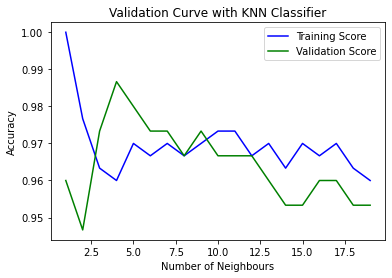

In [9]:
param_rang = np.arange(1,20,1)
train_score, test_score = validation_curve(KNeighborsClassifier(),X,y,param_name='n_neighbors',param_range=param_rang,scoring='accuracy',cv=3,n_jobs=1)

train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)

test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.plot(param_rang,train_mean,label="Training Score",color='b')
plt.plot(param_rang,test_mean,label="Validation Score",color='g')

plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend(loc = 'best')
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

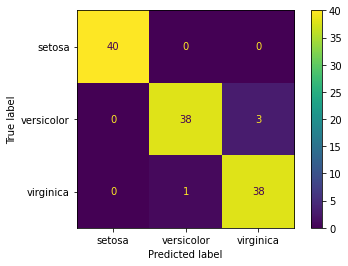

In [18]:
plot_confusion_matrix(estimator=knn,X=X_train,y_true=y_train,cmap='viridis')


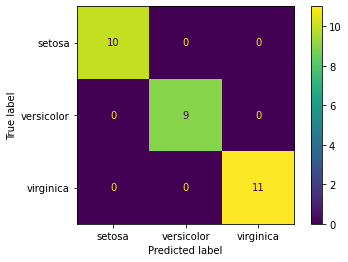

In [19]:
plot_confusion_matrix(estimator=knn,X=X_test,y_true=y_test,cmap='viridis')

In [20]:
from sklearn.metrics import classification_report

In [21]:
train_report = classification_report(y_true=y_train,y_pred=train_pred)
test_report = classification_report(y_true=y_test,y_pred=test_pred)

print('Training Classification Report')
print(train_report)
print('\n')
print('Testing Classification Report')
print(test_report)


Training Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.93      0.95        41
   virginica       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



Testing Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [23]:
rfc.feature_importances_

array([0.09045457, 0.03823582, 0.41653901, 0.45477061])

In [24]:
import dtale

In [27]:
d = dtale.show(data)
d.open_browser()

2021-11-12 21:38:00,502 - INFO     - NumExpr defaulting to 4 threads.


In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

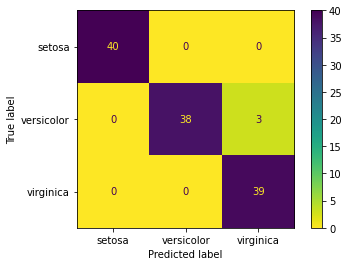

In [37]:
plot_confusion_matrix(logreg,X=X_train,y_true=y_train,cmap='viridis_r')

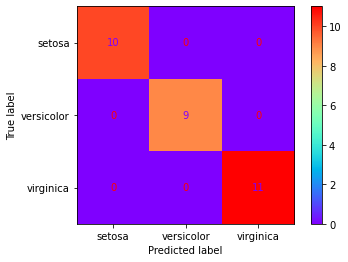

In [40]:
plot_confusion_matrix(logreg,X=X_test,y_true=y_test,cmap='rainbow')

In [41]:
pred_train_logreg = classification_report(y_true=y_train,y_pred=train_pred)
pred_test_logreg = classification_report(y_true=y_test,y_pred=test_pred)

print('Classification Report of Training Data')
print(pred_train_logreg)
print('\n')
print('Classification Report of Testing Data')
print(pred_test_logreg)


Classification Report of Training Data
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      0.93      0.96        41
   virginica       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120



Classification Report of Testing Data
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

